# Project nightlight - Sending Telemetry

![Alt Text](https://media.giphy.com/media/kvl2YhR110qsBrHid2/giphy.gif) ![Alt Text](https://media.giphy.com/media/RMGsFdXUb36o0lZI2u/giphy.gif)


## Pre-requisitos

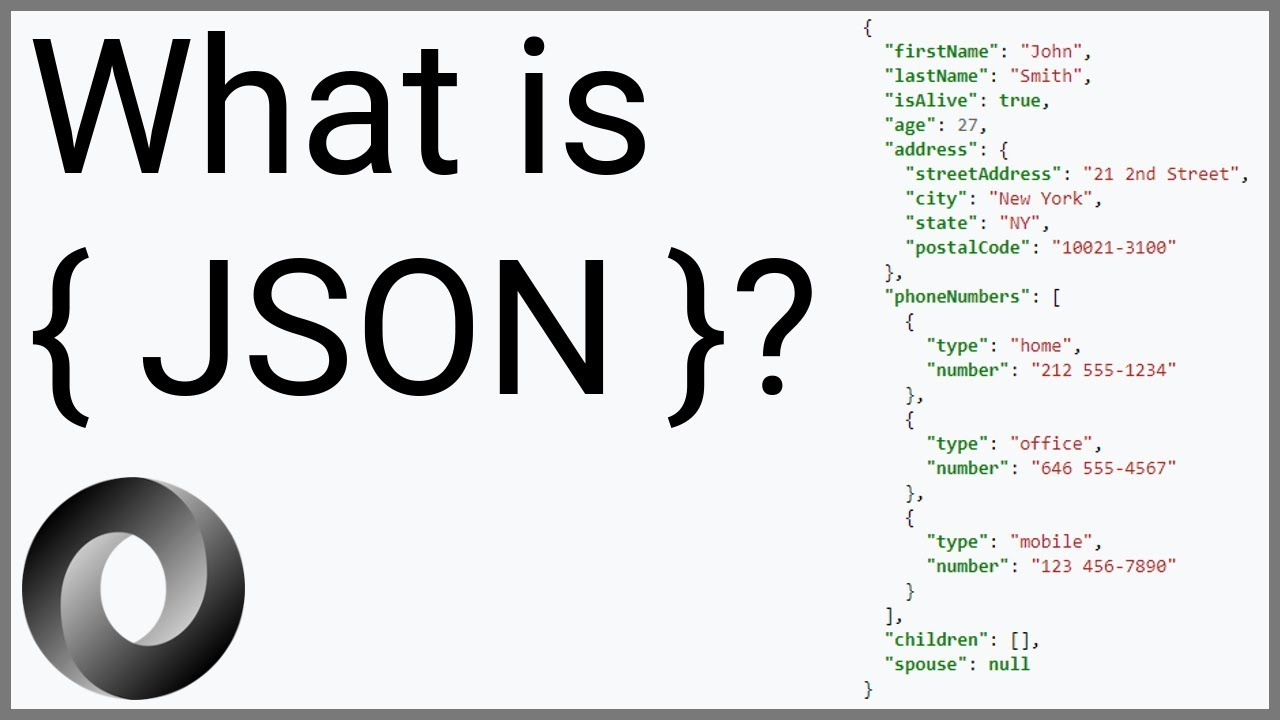

JSON (JavaScript Object Notation) é um formato leve de troca de dados.
Para usar no python basta importar o módulo nativo
> import json

## Código

In [2]:
import time
import json
import random
from counterfit_connection import CounterFitConnection
from counterfit_shims_grove.grove_light_sensor_v1_2 import GroveLightSensor
from counterfit_shims_grove.grove_led import GroveLed
import paho.mqtt.client as mqtt

# Inicializa a conexão simulada com o endereço IP e porta especificados
CounterFitConnection.init('127.0.0.1', 5001)

# Configura o sensor de luminosidade na porta 0
light_sensor = GroveLightSensor(0)

# Configura o LED na porta 5
led = GroveLed(5)

# Configuração do broker MQTT
broker = 'mqtt.eclipseprojects.io'  # Endereço do broker MQTT
port = 1883  # Porta padrão para conexões MQTT
telemetry_topic = "capacitacao-iot/telemetria"  # Tópico de telemetria para envio de dados

# Gera um identificador único para o cliente MQTT
client_id = f'capacitacao-iot-mqtt-nightlight_client-{random.randint(0, 100000)}'
print("Client ID: " + client_id)

# Função de callback chamada ao conectar-se ao broker MQTT
def on_connect(client, userdata, flags, reason_code, properties):
    # Verifica se a conexão foi bem-sucedida ou houve falha
    if reason_code != 0:
        print(f"Falha ao conectar: {reason_code}. 'loop_forever()' tentará reconectar.")
    else:
        print("Conectado ao broker MQTT!")

# Cria o cliente MQTT e configura a função de callback
mqttc = mqtt.Client(mqtt.CallbackAPIVersion.VERSION2, client_id=client_id)
mqttc.on_connect = on_connect  # Associa a função de callback ao evento de conexão
mqttc.user_data_set([])  # Configura dados de usuário, se necessário

# Conecta ao broker MQTT e inicia o loop de comunicação
mqttc.connect(broker, port)
mqttc.loop_start()

# Aguarda um tempo inicial para garantir que a conexão esteja estabelecida
time.sleep(1)

# Loop principal para monitorar e enviar dados de luminosidade via MQTT
while True:
    # Lê o nível de luminosidade do sensor
    light = light_sensor.light

    # Formata a leitura do sensor em JSON para envio
    light_read = json.dumps({"light": light})

    # Envia os dados de luminosidade ao broker MQTT
    print("Enviando JSON:", light_read, "no tópico:", telemetry_topic)
    mqttc.publish(telemetry_topic, light_read)

    # Liga ou desliga o LED dependendo do nível de luminosidade
    if light < 300:
        led.on()  # Liga o LED
    else:
        led.off()  # Desliga o LED

    # Aguarda 1 segundo antes de repetir o ciclo
    time.sleep(1)


Client ID: capacitacao-iot-mqtt-nightlight_client-38235
Conectado ao broker MQTT!
Enviando JSON: {"light": 916} no tópico: capacitacao-iot/telemetria
Enviando JSON: {"light": 802} no tópico: capacitacao-iot/telemetria
Enviando JSON: {"light": 671} no tópico: capacitacao-iot/telemetria
Enviando JSON: {"light": 111} no tópico: capacitacao-iot/telemetria
Enviando JSON: {"light": 207} no tópico: capacitacao-iot/telemetria
Enviando JSON: {"light": 525} no tópico: capacitacao-iot/telemetria
Enviando JSON: {"light": 639} no tópico: capacitacao-iot/telemetria
Enviando JSON: {"light": 275} no tópico: capacitacao-iot/telemetria
Enviando JSON: {"light": 615} no tópico: capacitacao-iot/telemetria
Enviando JSON: {"light": 35} no tópico: capacitacao-iot/telemetria
Enviando JSON: {"light": 565} no tópico: capacitacao-iot/telemetria
Enviando JSON: {"light": 937} no tópico: capacitacao-iot/telemetria
Enviando JSON: {"light": 526} no tópico: capacitacao-iot/telemetria
Enviando JSON: {"light": 423} no tó

KeyboardInterrupt: 